### PRG 2 : You are given a dataset with categorical variables about customer satisfaction levels (Low, Medium, High) and whether customers made repeat purchases (Yes/No). Create visualizations such as bar plots or stacked bar charts to explore the relationship between satisfaction level and repeat purchases. What can you infer from the data?


--- Customer Data Snippet ---
  Satisfaction Level Repeat Purchase
0             Medium             Yes
1               High             Yes
2               High             Yes
3             Medium             Yes
4                Low              No

Total number of customers: 500



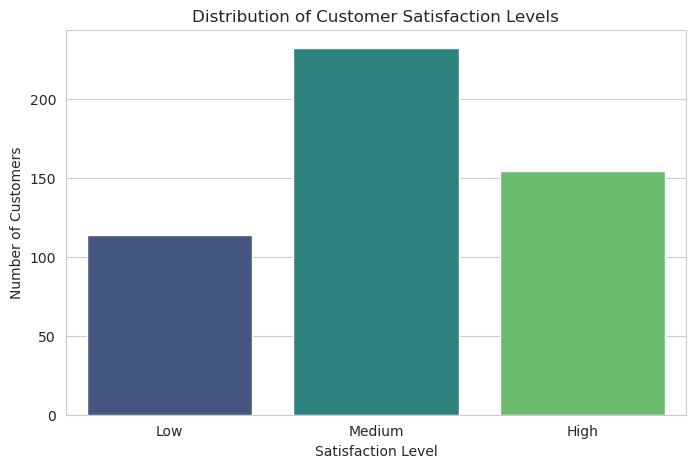

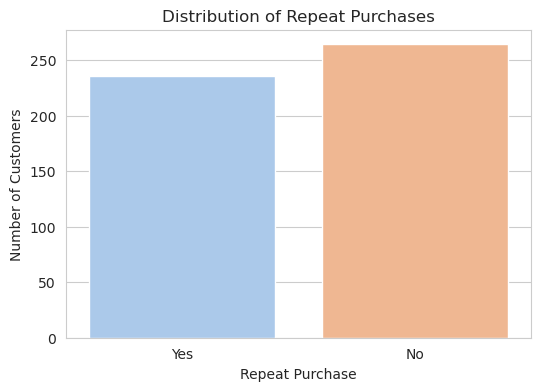

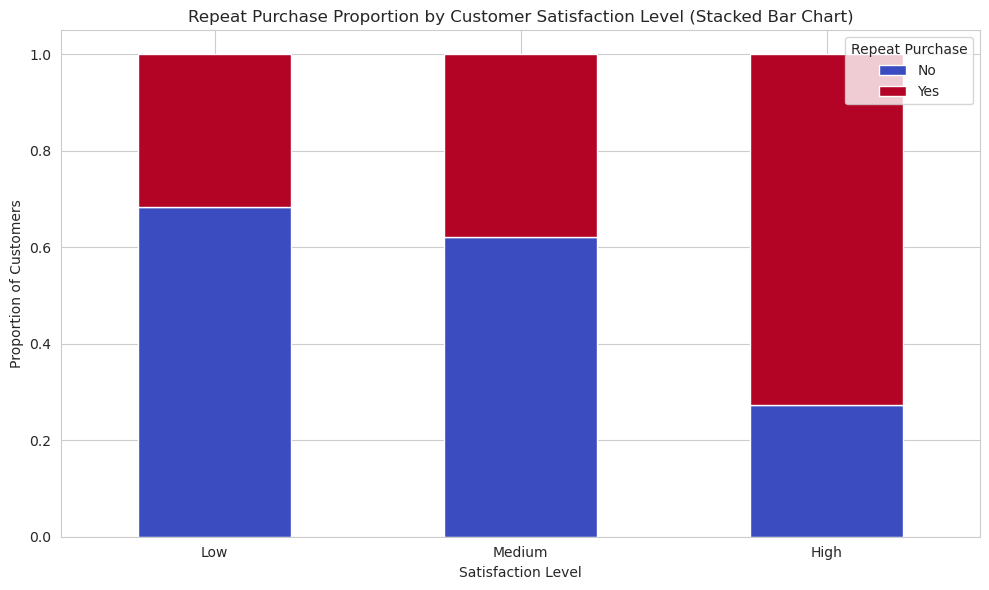

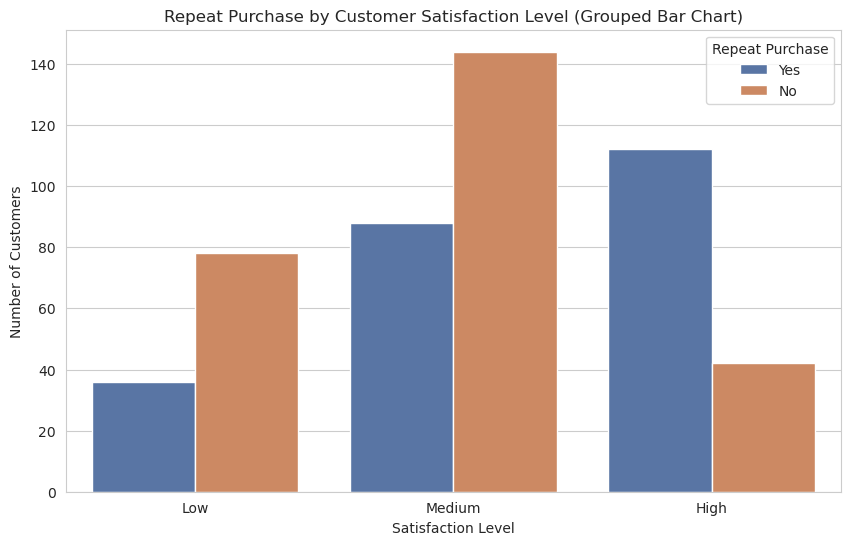

--- Inferences from the Data ---
To infer from the data, we examine the created visualizations, particularly the stacked and grouped bar charts.

Cross-Tabulation of Satisfaction Level vs. Repeat Purchase:
Repeat Purchase      No  Yes  All
Satisfaction Level               
High                 42  112  154
Low                  78   36  114
Medium              144   88  232
All                 264  236  500

Proportion of Repeat Purchase by Satisfaction Level (in %):
Repeat Purchase        No    Yes
Satisfaction Level              
High                27.27  72.73
Low                 68.42  31.58
Medium              62.07  37.93


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('customer_data.csv')
np.random.seed(42) 

satisfaction_levels = ['Low', 'Medium', 'High']
repeat_purchases = ['No', 'Yes']

data = {
 'Satisfaction Level': np.random.choice(satisfaction_levels, size=500, p=[0.2, 0.5, 0.3]),
 'Repeat Purchase': np.random.choice(repeat_purchases, size=500, p=[0.6, 0.4]) # Initial general distribution
}
df = pd.DataFrame(data)

df.loc[df['Satisfaction Level'] == 'High', 'Repeat Purchase'] = np.random.choice(['Yes', 'No'],
size=len(df[df['Satisfaction Level'] == 'High']), p=[0.8, 0.2])
df.loc[df['Satisfaction Level'] == 'Low', 'Repeat Purchase'] = np.random.choice(['No', 'Yes'],
size=len(df[df['Satisfaction Level'] == 'Low']), p=[0.7, 0.3])
print("--- Customer Data Snippet ---")
print(df.head())
print(f"\nTotal number of customers: {len(df)}\n")

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Satisfaction Level', order=satisfaction_levels, palette='viridis')
plt.title('Distribution of Customer Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Repeat Purchase', palette='pastel')
plt.title('Distribution of Repeat Purchases')
plt.xlabel('Repeat Purchase')
plt.ylabel('Number of Customers')
plt.show()

satisfaction_purchase_counts = df.groupby(['Satisfaction Level', 'Repeat Purchase']).size().unstack(fill_value=0)

satisfaction_purchase_proportions = satisfaction_purchase_counts.apply(lambda x: x / x.sum(),
axis=1)
fig, ax = plt.subplots(figsize=(10, 6))
satisfaction_purchase_proportions.loc[satisfaction_levels, ['No', 'Yes']].plot(kind='bar', stacked=True,
ax=ax, cmap='coolwarm')
plt.title('Repeat Purchase Proportion by Customer Satisfaction Level (Stacked Bar Chart)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.legend(title='Repeat Purchase')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Satisfaction Level', hue='Repeat Purchase', order=satisfaction_levels,
palette='deep')
plt.title('Repeat Purchase by Customer Satisfaction Level (Grouped Bar Chart)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Customers')
plt.legend(title='Repeat Purchase')
plt.show()

print("--- Inferences from the Data ---")
print("To infer from the data, we examine the created visualizations, particularly the stacked and grouped bar charts.")

cross_tab = pd.crosstab(df['Satisfaction Level'], df['Repeat Purchase'], margins=True)
print("\nCross-Tabulation of Satisfaction Level vs. Repeat Purchase:")
print(cross_tab)
cross_tab_prop = pd.crosstab(df['Satisfaction Level'], df['Repeat Purchase'], normalize='index') * 100
print("\nProportion of Repeat Purchase by Satisfaction Level (in %):")
print(cross_tab_prop.round(2))

## Inference
Based on the Charts, here is how we could interpret the data
- **Customers with High Satisfaction tend to have a higher number of repeat purchases**
- **Low Satisfaction Customers are mostly not making repeat purchases.**
- **Medium Satisfaction has mixed behaviour - are roughly even split into Yes/No**